In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,Dropout,BatchNormalization,MaxPool2D

In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [3]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
x_test.shape

(10000, 32, 32, 3)

In [7]:
y_test.shape

(10000, 1)

In [8]:
y_train[1]

array([9], dtype=uint8)

In [9]:
w_grid=10
l_grid=10

In [10]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']


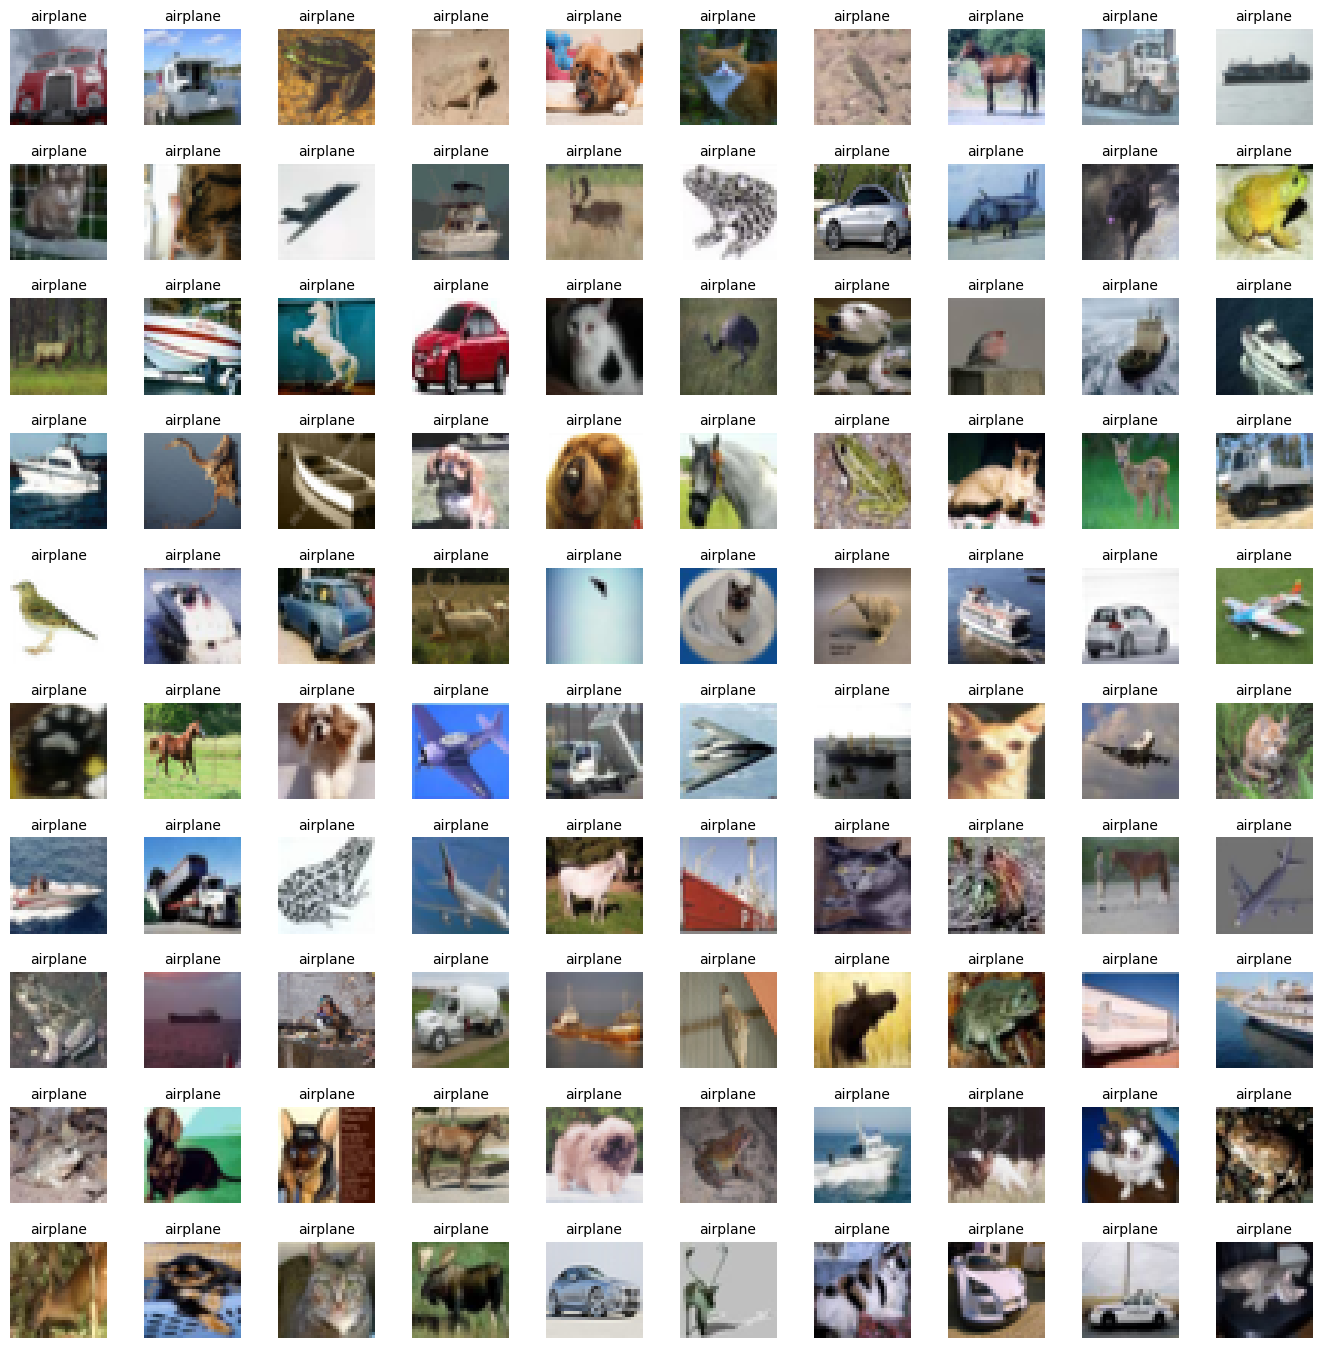

In [11]:
fig,axes=plt.subplots(l_grid,w_grid,figsize=(17,17))
axes=axes.ravel()
n_train=len(x_train)


for i in np.arange(0, w_grid * l_grid):
    index = np.random.randint(0, n_train)
    axes[i].imshow(x_train[index])  # Corrected image indexing
    label_index = int(y_train[index].argmax())  # Get class index from one-hot encoded labels
    axes[i].set_title(labels[label_index], fontsize=10)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

In [12]:
#normalize x_train
x_train=x_train/255.0
x_test=x_test/255.0


In [13]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [14]:
x_test

array([[[[0.61960784, 0.43921569, 0.19215686],
         [0.62352941, 0.43529412, 0.18431373],
         [0.64705882, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254902, 0.14117647],
         [0.49411765, 0.35686275, 0.14117647],
         [0.45490196, 0.33333333, 0.12941176]],

        [[0.59607843, 0.43921569, 0.2       ],
         [0.59215686, 0.43137255, 0.15686275],
         [0.62352941, 0.44705882, 0.17647059],
         ...,
         [0.53333333, 0.37254902, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509804, 0.13333333]],

        [[0.59215686, 0.43137255, 0.18431373],
         [0.59215686, 0.42745098, 0.12941176],
         [0.61960784, 0.43529412, 0.14117647],
         ...,
         [0.54509804, 0.38431373, 0.13333333],
         [0.50980392, 0.37254902, 0.13333333],
         [0.47058824, 0.34901961, 0.12941176]],

        ...,

        [[0.26666667, 0.48627451, 0.69411765],
         [0.16470588, 0.39215686, 0.58039216]

In [15]:
y_train=to_categorical(y_train)

In [16]:
y_train[1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [17]:
y_train[8]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [18]:
model=Sequential()

In [19]:
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(10,activation="softmax"))


C:\Users\kunal\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=['accuracy', 
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall")
])


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 16, 16, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,144,138 (4.36 MB)

 Trainable params: 1,143,690 (4.36 MB)

 Non-trainable params: 448 (1.75 KB)

In [22]:
model.fit(x_train, y_train, epochs=10)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 360s 226ms/step - accuracy: 0.4588 - loss: 1.5992 - precision: 0.6238 - recall: 0.3046
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 374s 239ms/step - accuracy: 0.7042 - loss: 0.8407 - precision: 0.7976 - recall: 0.6161
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 418s 234ms/step - accuracy: 0.7764 - loss: 0.6385 - precision: 0.8423 - recall: 0.7193
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 387s 237ms/step - accuracy: 0.8242 - loss: 0.5076 - precision: 0.8720 - recall: 0.7814
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 390s 249ms/step - accuracy: 0.8583 - loss: 0.4048 - precision: 0.8944 - recall: 0.8278
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 469s 266ms/step - accuracy: 0.8905 - loss: 0.3174 - precision: 0.9157 - recall: 0.8680
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 472s 285ms/step - accuracy: 0.9178 - loss: 0.2458 - precision: 0.9338 - recall: 0.9034
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 951s 608ms/step - accuracy: 0.9325 - loss: 0.1967 - pre

In [23]:
# Data cardinality is ambiguous. Make sure all arrays contain the same number of samples.'x' sizes: 50000
#'y' sizes: 100000
#Arguments target and output must have the same rank (ndim). Received: target.shape=(None, 10, 2), output.shape=(None, 10)
#still giving this error

In [24]:
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)


x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [27]:
predict = model.predict(x_test[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step


In [28]:
predict

array([[9.39102094e-08, 8.44831063e-12, 4.93637025e-08, 9.98986304e-01,
        2.22670344e-08, 1.01356651e-03, 1.59271563e-09, 3.62159358e-10,
        3.48633677e-09, 1.18017976e-12],
       [1.61952007e-09, 5.08528910e-06, 1.54959731e-14, 2.27189991e-15,
        6.50296310e-19, 1.49843833e-19, 3.32485419e-16, 1.11165769e-16,
        9.99994874e-01, 2.05945005e-12],
       [1.42668635e-02, 1.58744995e-04, 3.18442726e-05, 1.87372055e-03,
        4.12546302e-04, 1.83232601e-06, 2.77640481e-07, 4.36823575e-05,
        9.83210325e-01, 9.90570399e-08],
       [9.99895692e-01, 3.80927334e-09, 8.65572656e-05, 9.29005672e-09,
        2.62300544e-13, 1.42309484e-10, 2.31087827e-12, 2.46373678e-14,
        1.78086430e-05, 1.72767421e-12],
       [4.85780513e-11, 4.56830164e-11, 6.17834681e-04, 2.02301417e-05,
        2.17485167e-02, 1.60383813e-08, 9.77613389e-01, 4.84190375e-15,
        1.16944177e-10, 8.19412333e-12],
       [1.90455673e-09, 8.73431882e-12, 4.24041460e-08, 2.67408264e-04,
   

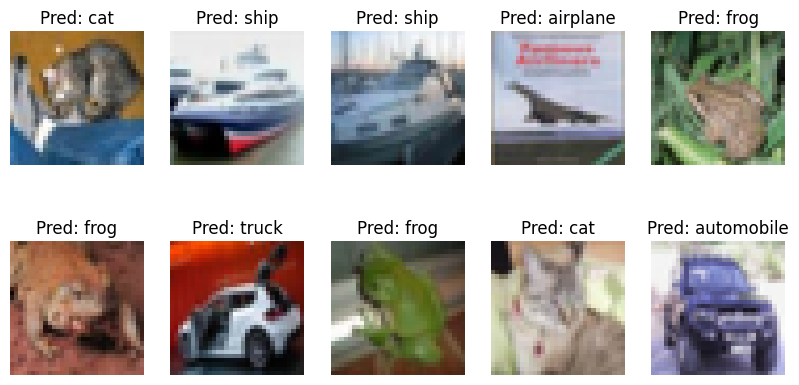

In [31]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(x_test[i])
    pred_label = labels[np.argmax(predict[i])]
    axes[i].set_title(f"Pred: {pred_label}")
    axes[i].axis('off')

plt.show()

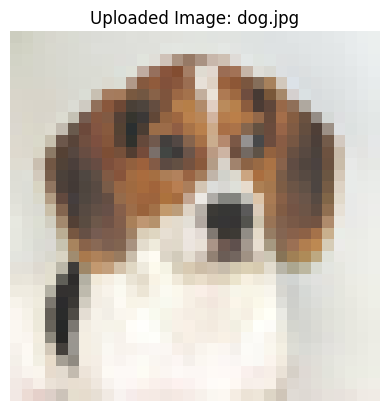

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Predicted Class: dog


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from PIL import Image  # Import from Pillow

# CIFAR-10 class labels
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
          'dog', 'frog', 'horse', 'ship', 'truck']

# Load and preprocess the image
img_path = r"C:\AI Ml Teachnook\dog.jpg"  # Use raw string for Windows path
img = Image.open(img_path)  # Open image using PIL
img = img.resize((32, 32))  # Resize to match CIFAR-10 model input

# Convert image to numpy array
img_array = image.img_to_array(img)  # Convert to array
img_array = img_array / 255.0  # Normalize pixel values (0-1)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension


# Display the image
plt.imshow(img)
plt.title("Uploaded Image: dog.jpg")
plt.axis("off")
plt.show()

# Predict the class using the already defined model
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)  # Get class with highest probability

# Show Prediction
print(f"Predicted Class: {labels[predicted_class]}")
